## ***loading dataset***

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# ***Feature engineering and EDA***

### ***Removing emojis***

In [4]:
import re
# removing emojis
def remove_emoji(text):
    """
    This function removes emojis from text using regex.
    """
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

# # Example usage
# text_with_emoji = "I am so happy 😊"
# text_without_emoji = remove_emoji(text_with_emoji)
# print(text_without_emoji)  # Output: I am so happy

In [5]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_emoji(x))

### ***Removing links, emails, mentions***

In [6]:
import re

def remove_links(text):
    """
    This function removes URLs from text using regex.
    """
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emails(text):
    """
    This function removes email addresses from text using regex.
    """
    email_pattern = re.compile(r'\S+@\S+')
    email_pattern = re.compile(r'\S+@\S+')
    return email_pattern.sub(r'', text)

def remove_mentions(text):
    """
    This function removes words with '@' symbol from text using regex.
    """
    mention_pattern = re.compile(r'@\w+')
    return mention_pattern.sub(r'', text)

# # Example usage
# text_with_links = "Check out this cool website: https://www.example.com"
# text_without_links = remove_links(text_with_links)
# print(text_without_links)  # Output: Check out this cool website:

# text_with_emails = "Contact me at john@example.com for more information"
# text_without_emails = remove_emails(text_with_emails)
# print(text_without_emails)  # Output: Contact me at  for more information

# # Example usage
# text_with_mentions = "Hey @john, did you see my message?"
# text_without_mentions = remove_mentions(text_with_mentions)
# print(text_without_mentions)  # Output: Hey , did you see my message?

In [7]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_links(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_emails(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_mentions(x))

In [8]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when is rationi...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### ***cleaning text removing hashtags, special characters, and numbers***

In [9]:
import re

def clean_text(text):
    """
    This function cleans text data by removing hashtags, special characters, and numbers using regex.
    """
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# # Example usage
# text_to_clean = "Check out this cool #website: https://www.example.com! #cool #awesome 123"
# cleaned_text = clean_text(text_to_clean)
# print(cleaned_text)  # Output: Check out this cool website cool awesome

In [10]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean_text(x))

In [11]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,Me ready to go at supermarket during the outbr...,Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when is rationing ...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### ***removing stopwords and convert strings to lower case***

In [12]:
from nltk.corpus import stopwords

In [13]:
# Preprocessing the text data
stop_words = set(stopwords.words('english'))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
train_df['OriginalTweet'] = train_df['OriginalTweet'].str.lower()

In [14]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive
4,3803,48755,NaN,16-03-2020,me ready go supermarket outbreak not im parano...,Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering stock supermarket shel...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,you know itâs getting tough rationing toilet p...,Positive
41155,44954,89906,NaN,14-04-2020,is wrong smell hand sanitizer starting turn,Neutral


### ***Getting all empty string columns***

In [15]:
train_df['OriginalTweet'][0]

''

In [16]:
#empty tweets col after preprocessing
empty_tweets_index = []
for i in range(len(train_df['OriginalTweet'])):
    if train_df['OriginalTweet'][i] == '':
        empty_tweets_index.append(i)

In [17]:
train_df = train_df.drop(empty_tweets_index, axis=0)

In [18]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive
4,3803,48755,NaN,16-03-2020,me ready go supermarket outbreak not im parano...,Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news regionâs first confirmed covid case ca...,Positive
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering stock supermarket shel...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,you know itâs getting tough rationing toilet p...,Positive
41155,44954,89906,NaN,14-04-2020,is wrong smell hand sanitizer starting turn,Neutral


### ***used SentimentIntensityAnalyzer for adding negative, positive, neutral and compound features***

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
nltk.download('vader_lexicon') #else we will get lookup error.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sent = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
com = []
def update(k):
    neg.append(k["neg"])
    neu.append(k["neu"])
    pos.append(k["pos"])
    com.append(k["compound"])

In [22]:
from tqdm import tqdm
for i in tqdm(train_df['OriginalTweet']):
    update(sent.polarity_scores(i))

100%|██████████████████████████████████████████████████████████████████████████| 41124/41124 [00:07<00:00, 5398.57it/s]


In [23]:
train_df["negative"] = neg
train_df["neutral"] = neu
train_df["positive"] = pos
train_df["compound"] = com

### ***After all the preprocessing dataset look like this***

In [24]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,negative,neutral,positive,compound
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,0.000,0.862,0.138,0.4588
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive,0.000,0.786,0.214,0.4588
3,3802,48754,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive,0.064,0.571,0.364,0.8127
4,3803,48755,NaN,16-03-2020,me ready go supermarket outbreak not im parano...,Extremely Negative,0.180,0.494,0.326,0.6300
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news regionâs first confirmed covid case ca...,Positive,0.000,0.887,0.113,0.4939
...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering stock supermarket shel...,Neutral,0.000,1.000,0.000,0.0000
41153,44952,89904,NaN,14-04-2020,response complaint provided citing covid relat...,Extremely Negative,0.286,0.714,0.000,-0.6369
41154,44953,89905,NaN,14-04-2020,you know itâs getting tough rationing toilet p...,Positive,0.114,0.682,0.205,0.2960
41155,44954,89906,NaN,14-04-2020,is wrong smell hand sanitizer starting turn,Neutral,0.274,0.442,0.283,0.0258


### ***tokenization on OriginalTweet columns***

In [25]:
# tokanization
from nltk.tokenize import word_tokenize
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(word_tokenize)

In [26]:
train_df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,negative,neutral,positive,compound
1,3800,48752,UK,16-03-2020,"[advice, talk, neighbours, family, exchange, p...",Positive,0.0,0.862,0.138,0.4588
2,3801,48753,Vagabonds,16-03-2020,"[coronavirus, australia, woolworths, give, eld...",Positive,0.0,0.786,0.214,0.4588


### ***vectorization***

In [27]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(tokens) for tokens in train_df['OriginalTweet']])

### ***Preparing the class labels assigning numbers based on sentiments***

In [28]:
# preparing class labels
import numpy as np

train_df['Sentiment'] = train_df['Sentiment'].str.lower()

n = np.array(train_df['Sentiment'])

y_act = []
for i in n:
    if i == 'neutral':
        y_act.append(0) # neutral
    if i == 'positive':
        y_act.append(1) # positive
    if i == 'extremely negative':
        y_act.append(2) # extreamly negative
    if i == 'negative':
        y_act.append(3) # negative
    if i == 'extremely positive':
        y_act.append(4) # extremely positive
    else:
        pass
y_act = np.array(y_act)

In [29]:
y_act

array([1, 1, 1, ..., 1, 0, 3])

# ***Training***

# Naive bayes

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_act, test_size=0.2, random_state=42)

In [ ]:
{'alpha': [0.00001, 0.001, 0.1, 1, 10, 100]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import loguniform

# Create a MultinomialNB model
nb = MultinomialNB()

# Define the parameter space to search
param_distributions = {'alpha': loguniform(0.01, 1.0)}# uniform(0, 1)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(nb, param_distributions=param_distributions, n_iter=100, cv=5)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020D7BD7B910>})

In [39]:
# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'alpha': 0.4594356712946165}
Best score:  0.48001464085551754


In [42]:
nb = MultinomialNB(alpha=0.4594356712946165)
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.4594356712946165)

### ***Model evaluation***

In [43]:
# Evaluating the model
y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.4809726443768997
Precision: 0.4934260372034517
Recall: 0.4809726443768997
F1 score: 0.48355932345953256


# Xgboost

In [44]:
import xgboost as xgb

In [47]:
xb = xgb.XGBClassifier(objective="multi:softmax")

params = {
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200]
}


random_search = RandomizedSearchCV(xb, params, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                            

In [48]:
# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best score:  0.5605335203518981


In [49]:
xb = xgb.XGBClassifier(objective="multi:softmax", num_class=5, n_estimators=200, max_depth=7, learning_rate=0.1)
xb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

### ***Model Evaluation***

In [50]:
y_pred_xb = xb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_xb))
print('Precision:', precision_score(y_test, y_pred_xb, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_xb, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred_xb, average='weighted'))

Accuracy: 0.56
Precision: 0.5739903990816632
Recall: 0.56
F1 score: 0.5535402582276219


### ***Confusion metric***

In [52]:
from sklearn.metrics import confusion_matrix
cm_xb = confusion_matrix(y_test, y_pred_xb)

print(cm_xb)

[[1329  126   14   85   11]
 [ 511 1249   51  275  198]
 [ 134   83  498  338   13]
 [ 476  418  200  847   42]
 [ 104  473   10   57  683]]


### ***Model Prediction***

In [57]:
# Predicting sentiment of new tweets
new_tweet = ['The movie I saw last night was a complete disappointment.']
new_tweet = vectorizer.transform(new_tweet)
sentiment = xb.predict(new_tweet)
print('Sentiment:', sentiment)

Sentiment: [0]


# ***Full flow featurization data preparation and tfidf vectorization to improve performance***

In [103]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [104]:
train_df.head(1)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral


In [105]:
# Data Cleansing
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_emoji(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_links(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_emails(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: remove_mentions(x))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean_text(x))
stop_words = set(stopwords.words('english'))
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
train_df['OriginalTweet'] = train_df['OriginalTweet'].str.lower()

#empty tweets col after preprocessing
empty_tweets_index = []
for i in range(len(train_df['OriginalTweet'])):
    if train_df['OriginalTweet'][i] == '':
        empty_tweets_index.append(i)
        
train_df = train_df.drop(empty_tweets_index, axis=0)

sent = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
com = []
def update(k):
    neg.append(k["neg"])
    neu.append(k["neu"])
    pos.append(k["pos"])
    com.append(k["compound"])
    
from tqdm import tqdm
for i in tqdm(train_df['OriginalTweet']):
    update(sent.polarity_scores(i))
    
train_df["negative"] = neg
train_df["neutral"] = neu
train_df["positive"] = pos
train_df["compound"] = com

100%|██████████████████████████████████████████████████████████████████████████| 41124/41124 [00:07<00:00, 5504.19it/s]


In [106]:
train_df.head(1)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,negative,neutral,positive,compound
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,0.0,0.862,0.138,0.4588


In [107]:
# y actual define class labels
train_df['Sentiment'] = train_df['Sentiment'].str.lower()

n = np.array(train_df['Sentiment'])

y_act = []
for i in n:
    if i == 'neutral':
        y_act.append(0) # neutral
    if i == 'positive':
        y_act.append(1) # positive
    if i == 'extremely negative':
        y_act.append(2) # extreamly negative
    if i == 'negative':
        y_act.append(3) # negative
    if i == 'extremely positive':
        y_act.append(4) # extremely positive
    else:
        pass
y_act = np.array(y_act)

In [108]:
y_act

array([1, 1, 1, ..., 1, 0, 3])

In [109]:
X = train_df.drop(['UserName','ScreenName', 'Location', 'TweetAt', 'Sentiment'], axis=1)

In [110]:
X.head(1)

,OriginalTweet,negative,neutral,positive,compound
1,advice talk neighbours family exchange phone n...,0.0,0.862,0.138,0.4588


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y_act, test_size=0.2, random_state=42)

### ***Tfidf vectorization***

In [185]:
# tfidf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", min_df=10, ngram_range=(1,4), max_features=100000)
vectorizer.fit(X_train['OriginalTweet'].values)

X_tr_tweet_tfidf = vectorizer.transform(X_train['OriginalTweet'].values)
X_te_tweet_tfidf = vectorizer.transform(X_test['OriginalTweet'].values)

### ***Normalizing numerical feature***

In [113]:
# encoding numerical features.
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(X_train['negative'].values.reshape(-1,1))
X_tr_neg = normalizer.transform(X_train['negative'].values.reshape(-1,1))
X_te_neg = normalizer.transform(X_test['negative'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(X_train['neutral'].values.reshape(-1,1))
X_tr_neu = normalizer.transform(X_train['neutral'].values.reshape(-1,1))
X_te_neu = normalizer.transform(X_test['neutral'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(X_train['positive'].values.reshape(-1,1))
X_tr_pos = normalizer.transform(X_train['positive'].values.reshape(-1,1))
X_te_pos = normalizer.transform(X_test['positive'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(X_train['compound'].values.reshape(-1,1))
X_tr_com = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_te_com = normalizer.transform(X_test['compound'].values.reshape(-1,1))

### ***Final data***

In [114]:
from scipy.sparse import hstack
X_tr = hstack((X_tr_tweet_tfidf, X_tr_neg, X_tr_neu, X_tr_pos, X_tr_com)).tocsr()
X_te = hstack((X_te_tweet_tfidf, X_te_neg, X_te_neu, X_te_pos, X_te_com)).tocsr()

### ***Hyperparameter tuning***

In [150]:
xb_tfidf = xgb.XGBClassifier(objective="multi:softmax", num_class=5, n_estimators=200, max_depth=7, learning_rate=0.5)
# xb_tfidf.fit(X_train, y_train)
params = {
    "learning_rate": [0.01,0.03,0.05,0.1,0.15, 0.2],
    "max_depth": [3, 5, 10],
    "n_estimators": [100, 200, 500, 1000, 2000],
    "colsample_bytree": [0.1,0.3,0.5,1],
    "subsample": [0.1,0.3,0.5,1]
}


random_search_tfidf = RandomizedSearchCV(xb_tfidf, params, cv=5)
random_search_tfidf.fit(X_tr, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

In [151]:
# Print the best parameters and score
print("Best parameters: ", random_search_tfidf.best_params_)
print("Best score: ", random_search_tfidf.best_score_)

Best parameters:  {'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
Best score:  0.753305252828494


In [152]:
xb_tfidf = xgb.XGBClassifier(objective="multi:softmax", num_class=5, subsample=0.5, n_estimators=2000, max_depth=3, learning_rate=0.05, colsample_bytree=0.1)
xb_tfidf.fit(X_tr, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

### ***Model Evaluation***

In [153]:
y_pred_xb_tfidf = xb_tfidf.predict(X_te)
print('Accuracy:', accuracy_score(y_test, y_pred_xb_tfidf))
print('Precision:', precision_score(y_test, y_pred_xb_tfidf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_xb_tfidf, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred_xb_tfidf, average='weighted'))

Accuracy: 0.7529483282674772
Precision: 0.7597118593382369
Recall: 0.7529483282674772
F1 score: 0.7475330520793451


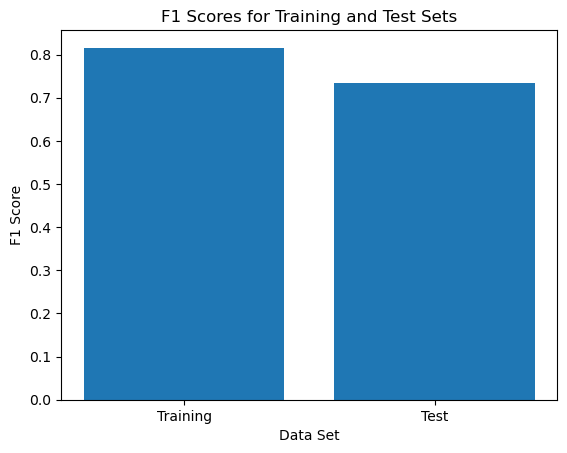

In [154]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

y_pred_tr_xb_tfidf = xb_tfidf.predict(X_tr)
y_pred_te_xb_tfidf = xb_tfidf.predict(X_te)
# Calculate the F1 scores for training and test sets
train_f1 = f1_score(y_train, y_pred_tr_xb_tfidf, average='macro')
test_f1 = f1_score(y_test, y_pred_xb_tfidf, average='macro')

# Plot the F1 scores
plt.bar(['Training', 'Test'], [train_f1, test_f1])
plt.title('F1 Scores for Training and Test Sets')
plt.xlabel('Data Set')
plt.ylabel('F1 Score')
plt.show()

### ***Confusion Metric***

In [156]:
from sklearn.metrics import confusion_matrix

cm_tfidf = confusion_matrix(y_test, y_pred_xb_tfidf)

print(cm_tfidf)

[[1410   89    5   55    6]
 [  26 1926   16  129  187]
 [   4   20  536  505    1]
 [  70  137  177 1592    7]
 [   3  575    4   16  729]]


### ***Model Prediction***

In [186]:
# Predicting sentiment of new tweets
new_tweet = ['This frozen pizza was terrible. The crust was soggy and the toppings were bland.']

sent = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
com = []
def update(k):
    neg.append(k["neg"])
    neu.append(k["neu"])
    pos.append(k["pos"])
    com.append(k["compound"])
    
from tqdm import tqdm
for i in tqdm(new_tweet):
    update(sent.polarity_scores(i))

# create a dictionary from the lists
data = {'OriginalTweet': new_tweet, 'negative': neg, 'neutral': neu, 'positive': pos, 'compound': com}

# create a DataFrame from the dictionary
df_future_unseen_data = pd.DataFrame(data)

X_te_tweet_tfidf_future = vectorizer.transform(df_future_unseen_data['OriginalTweet'])

normalizer = Normalizer()
normalizer.fit(df_future_unseen_data['negative'].values.reshape(-1,1))
X_te_neg_future = normalizer.transform(df_future_unseen_data['negative'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(df_future_unseen_data['neutral'].values.reshape(-1,1))
X_te_neu_future = normalizer.transform(df_future_unseen_data['neutral'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(df_future_unseen_data['positive'].values.reshape(-1,1))
X_te_pos_future = normalizer.transform(df_future_unseen_data['positive'].values.reshape(-1,1))

normalizer = Normalizer()
normalizer.fit(df_future_unseen_data['compound'].values.reshape(-1,1))
X_te_com_future = normalizer.transform(df_future_unseen_data['compound'].values.reshape(-1,1))

X_te_future = hstack((X_te_tweet_tfidf_future, X_te_neg_future, X_te_neu_future, X_te_pos_future, X_te_com_future)).tocsr()

sentiment = xb_tfidf.predict(X_te_future)
# print('Sentiment:', sentiment)

if sentiment[0] == 0:
    print("Neutral")
elif sentiment[0] == 1:
    print("Positive")
elif sentiment[0] == 2:
    print("Extremely Negative")
elif sentiment[0] == 3:
    print("Negative")
elif sentiment[0] == 4:
    print("Extremely positive")
else:
    pass

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Negative


### ***Saving Model***

In [176]:
import joblib

In [178]:
# Save the model to a file
joblib.dump(xb_tfidf, 'xb_tfidf_model1.pkl')

['xb_tfidf_model1.pkl']

In [187]:
joblib.dump(vectorizer, 'vectorizer_model1.pkl')

['vectorizer_model1.pkl']

## ***Best Model***

In [4]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names = ["Vectorizer", "Model", "F1 Score"] # # http://zetcode.com/python/prettytable/
table.add_row(["TFIDF", "Xgboost", 0.7475])
print(table)

+------------+---------+----------+
| Vectorizer |  Model  | F1 Score |
+------------+---------+----------+
|   TFIDF    | Xgboost |  0.7475  |
+------------+---------+----------+


## ***Best Params***

In [5]:
table=PrettyTable()
table.field_names = ["subsample", "n_estimators", "max_depth", 'learning_rate', 'colsample_bytree'] # # http://zetcode.com/python/prettytable/
table.add_row([0.5,2000,3,0.05,0.1])
print(table)

+-----------+--------------+-----------+---------------+------------------+
| subsample | n_estimators | max_depth | learning_rate | colsample_bytree |
+-----------+--------------+-----------+---------------+------------------+
|    0.5    |     2000     |     3     |      0.05     |       0.1        |
+-----------+--------------+-----------+---------------+------------------+


# ***Conclusion***

- The sentiment analysis model has a moderate performance. The accuracy of 0.75 indicates that 75% of the predictions made by the model are correct. The precision of 0.76 indicates that when the model predicts a tweet as positive or negative, it is correct 76% of the time. The recall of 0.75 indicates that the model correctly identifies 75% of the positive or negative tweets.

- The F1 score of 0.75 is a measure of the model's overall performance, taking into account both precision and recall. A score of 1 indicates perfect precision and recall, while a score of 0 indicates poor performance. A score of 0.75 suggests that the model's performance is moderate, with some room for improvement.